In [30]:
from sklearn.datasets import fetch_openml

# Load MNIST dataset from OpenML
mnist = fetch_openml('mnist_784', version=1)

# The dataset is now in the `mnist` object
X = mnist.data  # Features (28x28 pixel values)
y = mnist.target  # Labels (0-9 digits)

print(X.shape)  # (70000, 784), 70000 images, 28x28 pixels flattened
print(y.shape)  # (70000,), 70000 labels


(70000, 784)
(70000,)


In [31]:
import matplotlib.pyplot as plt

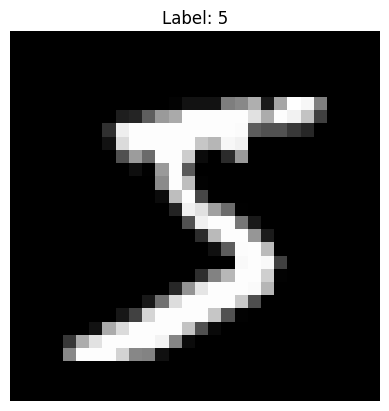

In [32]:
image_data = mnist.data.iloc[0].values  # First image as a 784-length array
image_data = image_data.reshape(28, 28)  # Reshape to 28x28 pixels

# Display the image
plt.imshow(image_data, cmap='gray')
plt.title(f"Label: {mnist.target.iloc[0]}")
plt.axis('off')  # Hide axes
plt.show()

This is the mnist dataset.It consists of hand written digits and thier labels.

Run the classification algorithmns such as LogisticRegression,KNeighborsClassifier, GaussianNB, SVM, Decision Trees, Random forest, KMeans and compare the accuracies of all the classifications models.

You have to import the model from sklearn

Training Logistic Regression...
Logistic Regression accuracy: 0.865
Training K-Nearest Neighbors...
K-Nearest Neighbors accuracy: 0.9365
Training Gaussian Naive Bayes...
Gaussian Naive Bayes accuracy: 0.5605
Training SVM...
SVM accuracy: 0.9615
Training Decision Tree...
Decision Tree accuracy: 0.815
Training Random Forest...
Random Forest accuracy: 0.947
K-Means accuracy: 0.2135

Classification Results:
Logistic Regression: 0.865
K-Nearest Neighbors: 0.9365
Gaussian Naive Bayes: 0.5605
SVM: 0.9615
Decision Tree: 0.815
Random Forest: 0.947


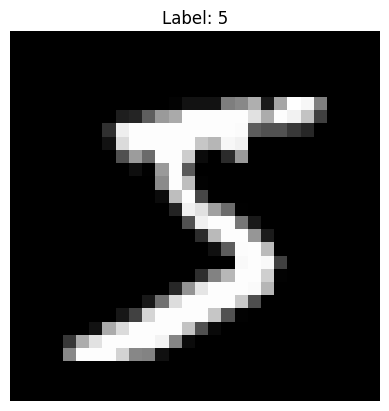

In [4]:
from sklearn.datasets import fetch_openml
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Load MNIST dataset from OpenML
mnist = fetch_openml('mnist_784', version=1)
X = mnist.data  # Features
y = mnist.target  # Labels

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Reduce the dataset size for faster processing (optional)
X_train = X_train[:10000]
y_train = y_train[:10000]
X_test = X_test[:2000]
y_test = y_test[:2000]

# Initialize classifiers
classifiers = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Gaussian Naive Bayes": GaussianNB(),
    "SVM": SVC(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
}
# Results
results = {}
for name, clf in classifiers.items():
    print(f"Training {name}...")
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = accuracy
    print(f"{name} accuracy: {accuracy}")

#Kmeans
kmeans = KMeans(n_clusters=10, random_state=0)
kmeans.fit(X_train)
kmeans_labels = kmeans.predict(X_test) # Predict on test data
# Convert kmeans_labels to strings to match y_test
kmeans_labels = kmeans_labels.astype(str)
kmeans_accuracy = accuracy_score(y_test, kmeans_labels)
print(f"K-Means accuracy: {kmeans_accuracy}")
# Print results
print("\nClassification Results:")
for name, accuracy in results.items():
    print(f"{name}: {accuracy}")

image_data = mnist.data.iloc[0].values  # First image
image_data = image_data.reshape(28, 28)  # Reshape to 28x28

#Image Plotting
plt.imshow(image_data, cmap='gray')
plt.title(f"Label: {mnist.target.iloc[0]}")
plt.axis('off')
plt.show()


Training Logistic Regression...
Logistic Regression accuracy: 0.865


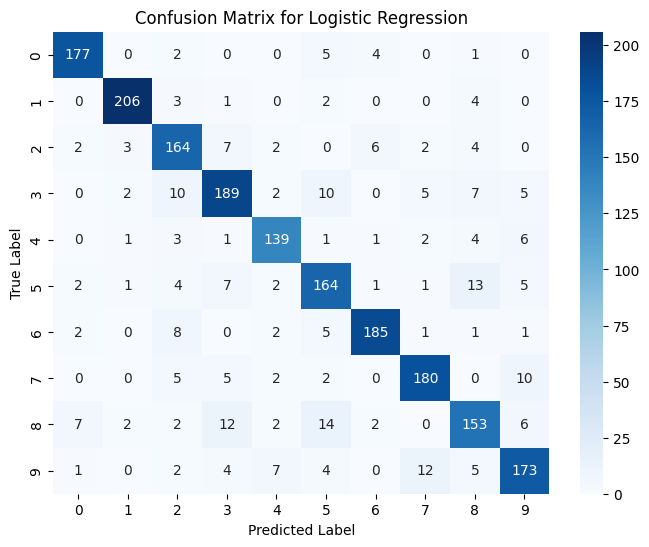

Training K-Nearest Neighbors...
K-Nearest Neighbors accuracy: 0.9365


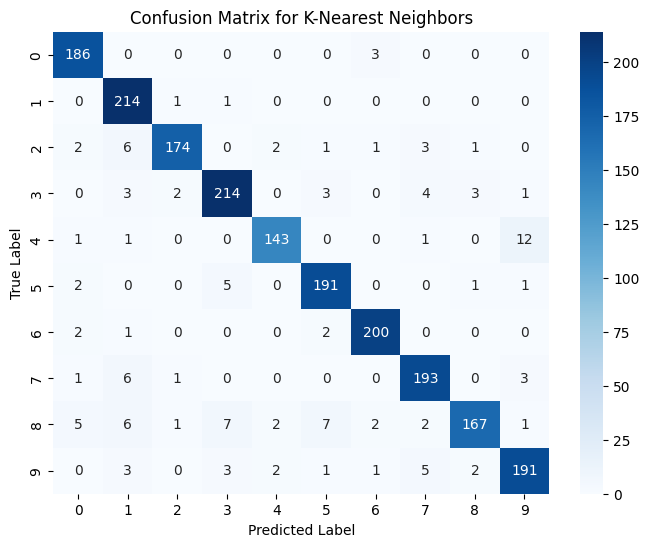

Training Gaussian Naive Bayes...
Gaussian Naive Bayes accuracy: 0.5605


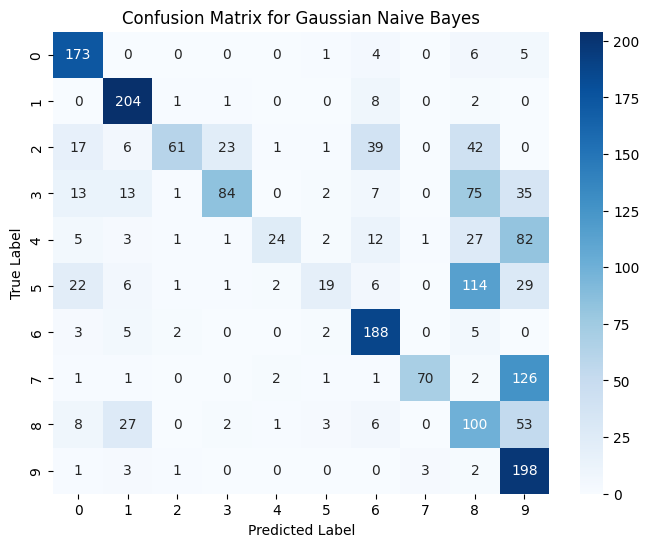

Training SVM...
SVM accuracy: 0.9615


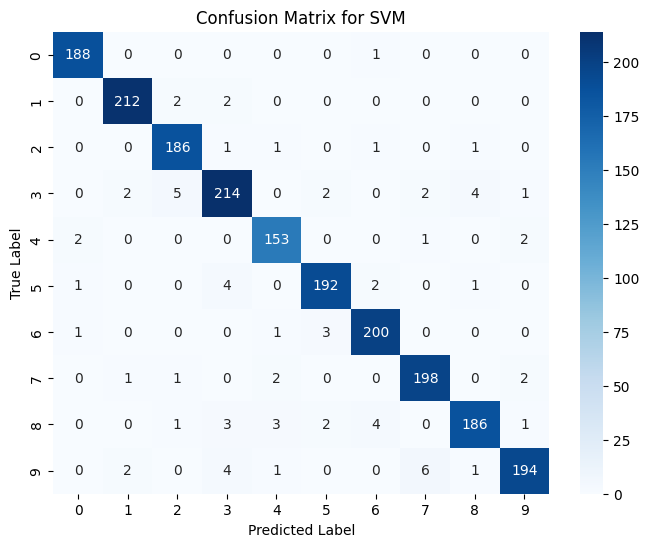

Training Decision Tree...
Decision Tree accuracy: 0.8215


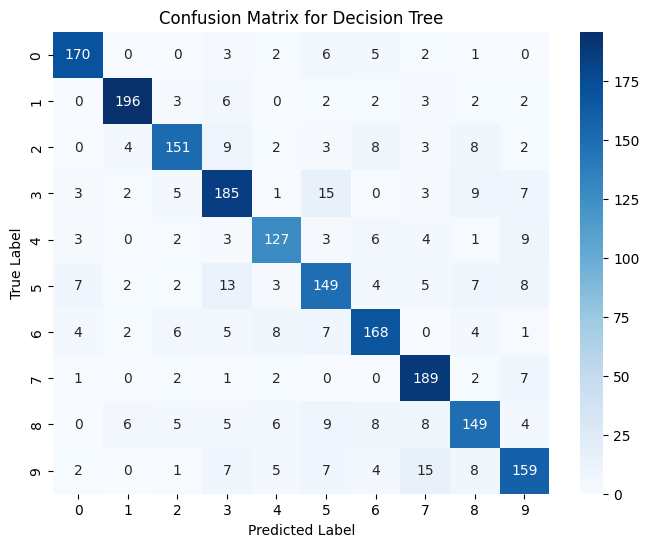

Training Random Forest...
Random Forest accuracy: 0.9505


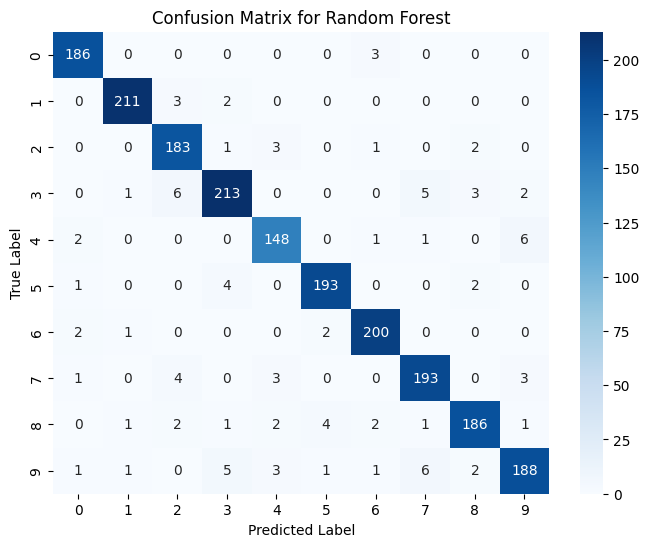

K-Means accuracy: 0.2135


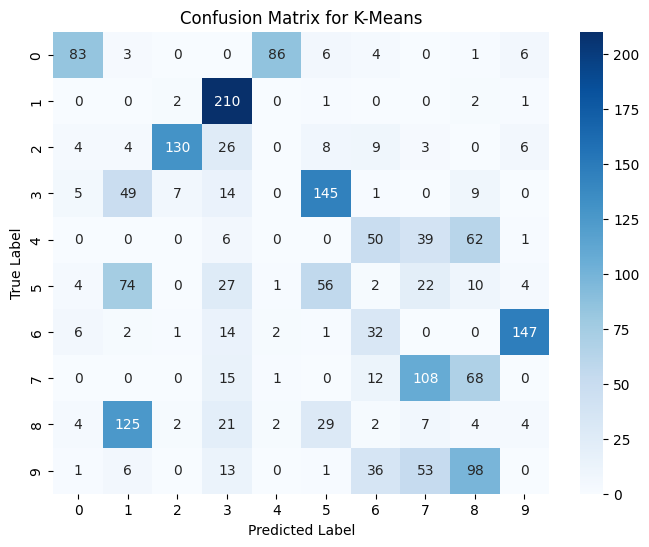


Classification Results:
Logistic Regression: 0.865
K-Nearest Neighbors: 0.9365
Gaussian Naive Bayes: 0.5605
SVM: 0.9615
Decision Tree: 0.8215
Random Forest: 0.9505
K-Means: 0.2135


In [2]:
# Results with Confusion Matrices
results = {}
for name, clf in classifiers.items():
    print(f"Training {name}...")
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = accuracy
    print(f"{name} accuracy: {accuracy}")

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(f"Confusion Matrix for {name}")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()

# KMeans
kmeans = KMeans(n_clusters=10, random_state=0)
kmeans.fit(X_train)
kmeans_labels = kmeans.predict(X_test) # Predict on test data

# Convert kmeans_labels to strings to match y_test
kmeans_labels = kmeans_labels.astype(str)
kmeans_accuracy = accuracy_score(y_test, kmeans_labels)
results["K-Means"] = kmeans_accuracy
print(f"K-Means accuracy: {kmeans_accuracy}")

# Confusion Matrix for KMeans
cm = confusion_matrix(y_test, kmeans_labels)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title(f"Confusion Matrix for K-Means")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Print results
print("\nClassification Results:")
for name, accuracy in results.items():
    print(f"{name}: {accuracy}")


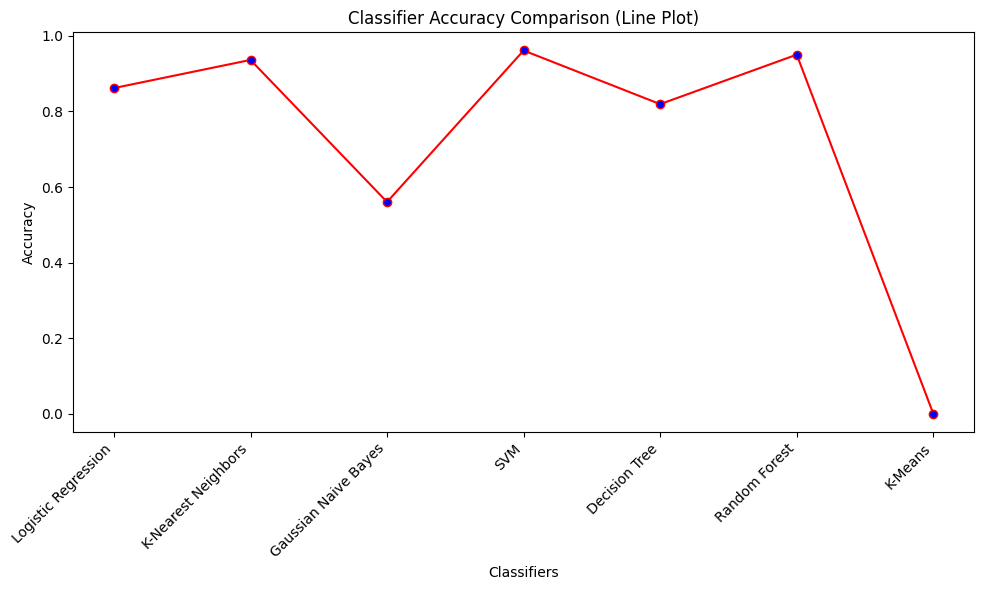

In [34]:
#Plotting line plot
plt.figure(figsize=(10, 6))
plt.plot(list(results.keys()), list(results.values()), marker='o', color='red', markerfacecolor='blue')
plt.xlabel("Classifiers")
plt.ylabel("Accuracy")
plt.title("Classifier Accuracy Comparison (Line Plot)")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

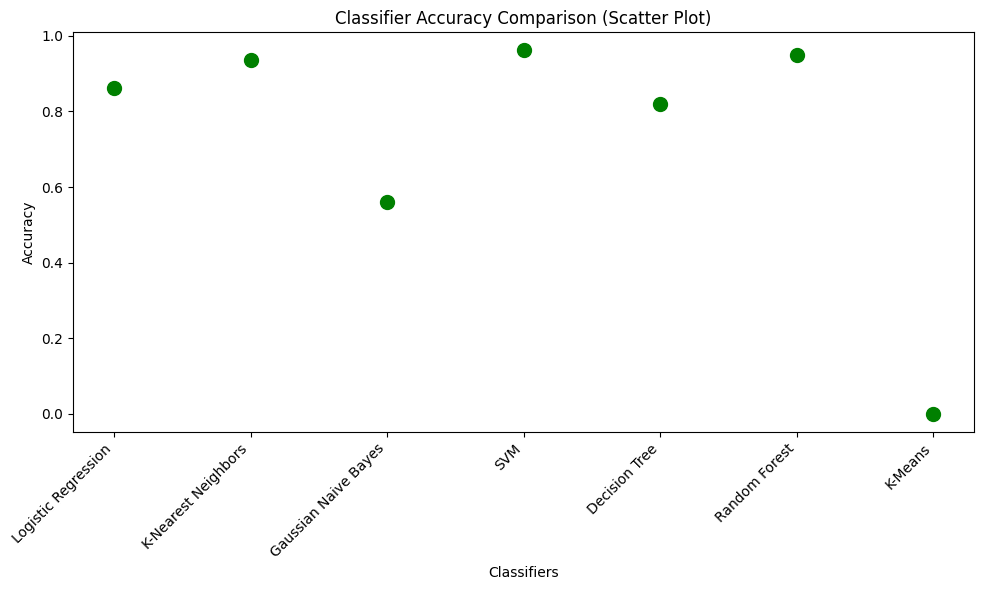

In [35]:
#Plotting Scatter Plot
plt.figure(figsize=(10, 6))
plt.scatter(list(results.keys()), list(results.values()), c='green', s=100)
plt.xlabel("Classifiers")
plt.ylabel("Accuracy")
plt.title("Classifier Accuracy Comparison (Scatter Plot)")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


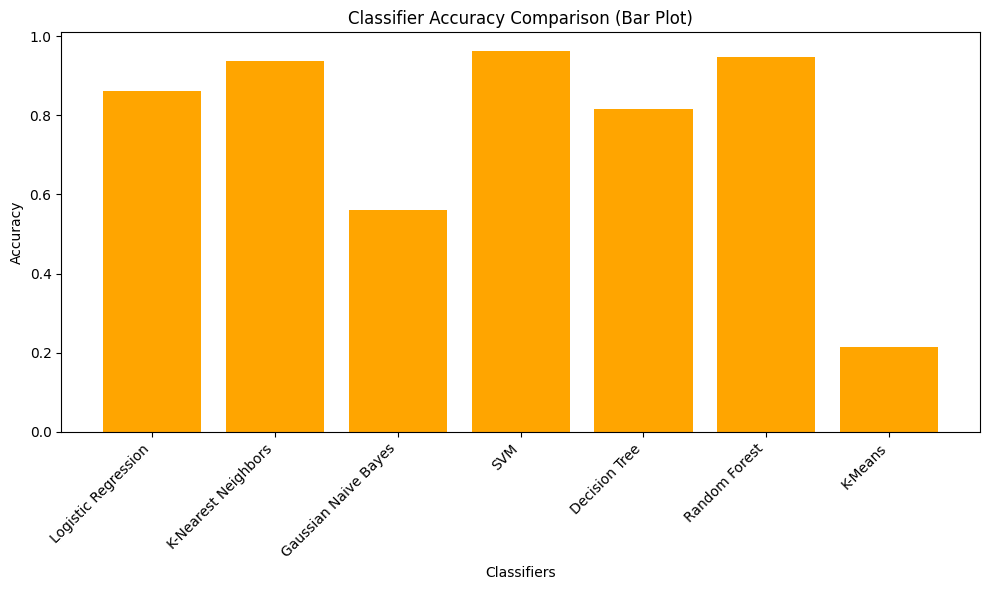

In [41]:
#Plotting Bar Plot
plt.figure(figsize=(10, 6))
plt.bar(list(results.keys()), list(results.values()), color='Orange')
plt.xlabel("Classifiers")
plt.ylabel("Accuracy")
plt.title("Classifier Accuracy Comparison (Bar Plot)")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()